## Simple Tennis Game Win Probability

This notebook demonstrates the simplest possible model of a tennis game. The probability that the server wins each service point is constant.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_context('notebook')
plt.style.use('ggplot')

In [3]:
def prob_hold_to_love(p):
    """Probability server holds at love."""
    return p**4

In [4]:
def prob_hold_to_15(p):
    """Probability server holds to 15."""
    q = 1-p
    return 4*(p**4)*q

In [5]:
def prob_hold_to_30(p):
    """Probability server holds to 30."""
    q = 1-p
    return 10*(p**4)*(q**2)

In [6]:
def prob_get_to_deuce(p):
    """Probability game gets to deuce at least once."""
    q = 1-p
    return 20*(p**3)*(q**3)

In [7]:
def prob_hold_via_deuce(p):
    """Probability server holds from deuce."""
    q = 1-p
    d = (p**2) / (1 - 2*p*q)
    return d*prob_get_to_deuce(p)

In [8]:
def prob_hold(p):
    """Probability server holds."""
    return (
        prob_hold_to_love(p) +
        prob_hold_to_15(p) + 
        prob_hold_to_30(p) + 
        prob_hold_via_deuce(p)
    )

Let's generate a plot of the probability that the server holds, as a function of the service point win probability.

In [9]:
PROBS = 25

In [10]:
point_probs = [p for p in np.arange(0, 1+1/PROBS, 1/PROBS)]

In [11]:
hold_probs = [float(prob_hold(p)) for p in point_probs]

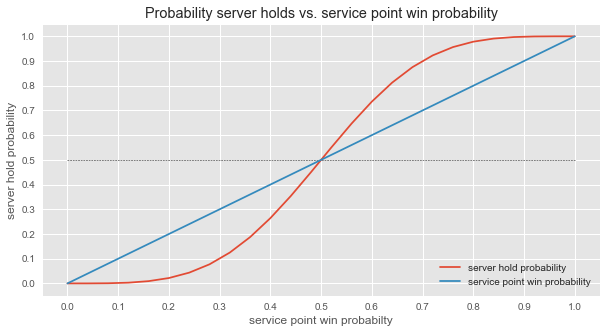

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(point_probs, hold_probs, label='server hold probability')
ax.plot(point_probs, point_probs, label='service point win probability')
ax.hlines(0.5, 0, 1, linestyles='dashed', linewidth=0.5, color='k')
TICKS = 10
ax.set_xticks(np.arange(0, 1+1/TICKS, 1/TICKS))
ax.set_yticks(np.arange(0, 1+1/TICKS, 1/TICKS))
ax.set_xlabel('service point win probabilty')
ax.set_ylabel('server hold probability')
ax.set_title(f'Probability server holds vs. service point win probability')
ax.legend(loc='lower right')
plt.show()

The red line is the probability that the server holds. The blue line is the service point win probability. You see that the game win probability (in red) is much higher than the point win probability if the point win probability is only slightly above 50%.

Let's check the the simple model using Roger Federer's career service point win percentage (obtained from [the ATP World Tour site here](http://www.atpworldtour.com/en/players/roger-federer/f324/player-stats).

In [13]:
prob_hold(0.69)

0.8884338858106955

From the same source, Federer's career service game win percentage is 89%. That's pretty close to the value predicted by the simple model!